# Práctica bloque 1 (Aprendizaje automático)
Autor: Janusz Jaroslaw Szturo
## Descripción
_Airbnb és una plataforma que permet publicar, descobrir i reservar diferents allotjaments. Disposa de propietats en més de 192 països repartides en 33.000 ciutats d'arreu del món. Es va crear a finals de l'any 2008 i avui dia és un dels recursos més buscats sobretot per viatjants. Únicament a Mallorca disposa de 14900 allotjaments de diferent tipus.
Un dels problemes que es troben els hosts quan volen afegir un **nou allotjament** a la plataforma és determinar el preu de lloguer. En aquest problema la pregunta que haureu de resoldre és: quin **preu de lloguer** posar a una propietat sabent les seves **característiques**?  
Per respondre a aquesta qüestió disposeu del conjunt de dades real d’Airbnb per l’illa de Mallorca (el trobareu a l’aula digital). Finalment us proposem dues opcions:_
1. _Estimar el preu directament a partir de les característiques dels allotjament._
2. _Convertir el preu en rangs i classificar-les en un d’aquests grups._


## Importar librerías básicas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar los datos

In [2]:
df_airbnb = pd.read_csv('data/airbnb.csv')

A continuación se enumeran las columnas y la información que proporciona cada una. Notar que en algunas columnas no tienen la descripción ya que no se ha podido deducir su utilidad a través del nombre y los datos que contiene:
- **id**: id del hospedador
- **listing_url**: url del alojamiento
- **scrape_id**: identificador de scrape
- **last_scraped**: fecha última vez que se realizó el scrape
- **name**: nombre del hospedador
- **description**: descripción del alojamiento proporcionada por el hospedador
- **neighborhood_overview**: descripción del vecindario proporcionada por el hospedador
- **picture_url**: url de la imagen del alojamiento
- **host_id**: id del hospedador
- **host_url**: url del hospedador
- **host_name**: nombre del hospedador
- **host_since**: fecha de creación de uenta
- **host_location**: ubicación hospedador
- **host_about**: información sobre el hospedador proporionada por él/ella mismo/a
- **host_response_time**: tiempo que tarda en responder a la solicitudes
- **host_response_rate**: ratio de respuesta del hospedador
- **host_acceptance_rate**: ratio de aceptación del hospedador
- **host_is_superhost**: true o false si el hospedador es superhost
- **host_thumbnail_url**: url de la miniatura del hospedador
- **host_picture_url**: url de la foto del hospedador
- **host_neighbourhood**: vecindario hospedador
- **host_listings_count**: NaN
- **host_total_listings_count**: NaN
- **host_verifications**: NaN
- **host_has_profile_pic**: true o false si tiene foto de perfil
- **host_identity_verified**: true o false si se ha verificado la identidad del hospedador
- **neighbourhood**: vecindario del alojamiento
- **neighbourhood_cleansed**: vecindario del alojamiendo "saneado"
- **neighbourhood_group_cleansed**: grupo de vecindario "saneado"
- **latitude**: latitud del alojamiento
- **longitude**: longitut del alojamiento
- **property_type**: tipo de propiedad del alojamiento
- **room_type**: tipo de habitación del alojamiento
- **accommodates**: a cuántas personas puede hospedar
- **bathrooms**: baños (todas las filas están vacías)
- **bathrooms_text**: texto con la cantidad y/o el tipo de baño. A veces solo se presenta el tipo de baño (privado, compartido)
- **bedrooms**: cantidad de dormitorios
- **beds**: cantidad de camas
- **amenities**: servicios/comodidades que se ofrecen (un string con las comoidads que se ofrecen ["comodidad1","comodida2"...]
- **price**: precio (símbolo de dólar x,xxx.xxx)
- **minimum_nights**: número mínimo de noches
- **maximum_nights**: número máximo de noches
- **minimum_minimum_nights**: NaN
- **maximum_minimum_nights**: NaN
- **minimum_maximum_nights**: NaN
- **maximum_maximum_nights**: NaN
- **minimum_nights_avg_ntm**: NaN
- **maximum_nights_avg_ntm**: NaN
- **calendar_updated**: NaN
- **has_availability**: true o false si tiene disponibilidad
- **availability_30**: días disponibles en los próximos 30 días desde la fecha de _last_scraped_
- **availability_60**: días disponibles en los próximos 60 días desde la fecha de _last_scraped_
- **availability_90**: días disponibles en los próximos 90 días desde la fecha de _last_scraped_
- **availability_365**: días disponibles en los próximos 365 días desde la fecha de _last_scraped_
- **calendar_last_scraped**: última actualización del calendario
- **number_of_reviews**: cantidad de reseñas
- **number_of_reviews_ltm**: reseñas en los últimos 12 meses (Last Twelve Months)
- **number_of_reviews_l30d**: reseñas en los últimos 30 días
- **first_review**: fecha primera reseña
- **last_review**: fecha última reseña
- **review_scores_rating**: puntuación de las reseñas (puntuación general)
- **review_scores_accuracy**: puntuación de las reseñas por la "precisión" del alojamiento (si lo publicitado concuerda con la realidad)
- **review_scores_cleanliness**: puntuación de las reseñas por la limpieza
- **review_scores_checkin**: puntuación de las reseñas por el checkin
- **review_scores_communication**: puntuación de las reseñas por la comunicación
- **review_scores_location**: puntuación de las reseñas por la ubicación
- **review_scores_value**: 
- **license**: licencia del hospedador
- **instant_bookable**: true o false si se puede reservar al momento
- **calculated_host_listings_count**: NaN
- **calculated_host_listings_count_entire_homes**: NaN
- **calculated_host_listings_count_private_rooms**: NaN
- **calculated_host_listings_count_shared_rooms**: NaN
- **reviews_per_month**: reseñas por mes

In [3]:
pd.set_option('display.max_columns', None) # Queremos visualizar todas las columnas
df_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",.,within an hour,100%,96%,f,https://a0.muscache.com/im/users/42942/profile...,https://a0.muscache.com/im/users/42942/profile...,NaN,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Calvià,NaN,39.51888,2.48182,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Oven"", ""Wifi"", ""Coffee maker"", ""Dishes and s...",$89.00,5,60,5,5,60,60,5.0,60.0,NaN,t,13,43,73,311,2020-09-21,103,8,2,2011-08-23,2020-09-06,96.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/529151/profil...,https://a0.muscache.com/im/users/529151/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Santa Margalida,NaN,39.76347,3.16255,Entire house,Entire home/apt,8,NaN,3 baths,4.0,7.0,"[""First aid kit"", ""Hair dryer"", ""Iron"", ""Washe...",$175.00,7,365,7,7,1125,1125,7.0,1125.0,NaN,t,0,0,0,0,2020-09-21,30,13,0,2019-01-18,2020-01-25,100.0,10.0,10.0,10.0,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47
2,105891,https://www.airbnb.com/rooms/105891,20200919153121,2020-09-20,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,The village's population does not reach two th...,https://a0.muscache.com/pictures/1036816/f36ce...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,within a few hours,100%,83%,t,https://a0.muscache.com/im/users/549192/profil...,https://a0.muscache.com/im/users/549192/profil...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,NaN,39.66044,3.07165,Entire townhouse,Entire home/apt,6,NaN,2 baths,3.0,4.0,"[""Smoke alarm"", ""Oven"", ""Wifi"", ""Garden or bac...",$140.00,6,365,6,6,365,365,6.0,365.0,NaN,t,23,53,83,325,2020-09-20,14,0,0,2012-06-19,2019-09-03,97.0,10.0,10.0,10.0,10.0,9.0,10.0,ETV/6127,t,2,2,0,0,0.14
3,106833,https://www.airbnb.com/rooms/106833,20200919153121,2020-09-20,Villa with a big pool in Mallorca,<b>The space</b><b

Para poder ver un poco mejor la información que nos proporciona el _dataset_ "airbnb.csv" vamos a sacar la siguiente información:  
- nombre de las columnas
- tipo de dato de cada columna
- cantidad de celdas vacías o nulas para cada columna.

In [4]:
col_names = list(df_airbnb.columns)
data_type = df_airbnb.dtypes
nan_count = df_airbnb.isna().sum()

In [5]:
df_caracteristicas = pd.DataFrame({'columna':col_names,
                                'tipo de dato':data_type,
                                'recuento nan':nan_count})
#nos interesa ver el índece de la columna en caso que queramos seleccionar las columnas por índice.
df_caracteristicas.index = range(len(df_caracteristicas))

In [6]:
pd.set_option('display.max_rows', None) # queremos visualizar todas las filas
df_caracteristicas

,columna,tipo de dato,recuento nan
0,id,int64,0
1,listing_url,object,0
2,scrape_id,int64,0
3,last_scraped,object,0
4,name,object,1
5,description,object,215
6,neighborhood_overview,object,9395
7,picture_url,object,0
8,host_id,int64,0
9,host_url,object,0


Con esta información y sabiendo que nos interesa poner el precio a una propiedad según las características de la misma, muchas de las columnas no nos aportan información o la información que puedan aportar no es válida para un alojamiento nuevo. Por lo tanto, podemos descartar todas aquellas columnas que no forman parte de la descripción de las características del alojamiento y/o servicios que se ofrecen, como puede ser el _id_ o la _listing_url_ entre otras. A continuación se enumeran aquellas columnas que sí se van a tener en cuenta, además de empezar debemos, convertir algunas columnas a un formato de datos con el que podamos trabajar:  

- neighbourhood_cleansed -> categórico a numérico (one hot encoding -> en pipeline)
- latitude -> no hace falta hacer nada
- longitude -> no hace falta hacer nada
- room_type  -> categórico a numéric (one hot encoding -> en pipeline)
- accommodates   -> no hace falta hacer nada
- bathrooms_text -> cogeremos el número de baños (nueva columna "bathrooms_count") 
- bedrooms   -> no hace falta hacer nada
- beds -> no hace falta hacer nada
- amenities -> obtendremos la cantidad de servicios/comodides (miraremos solo la cantidad -> nueva columna "amenities_count")
- price -> de object a numérico (quitar el dolar y la coma (,) de separación de  miles -> nueva columna "price_float")

In [7]:
selected_cols = ["neighbourhood_cleansed",
"latitude",
"longitude",
"room_type",
"accommodates",
"bathrooms_count",
"bedrooms",
"beds",
"amenities_count",                 
"price_float"]

In [8]:
#Convertimos la columna price de tipo object a númerico. 
# Sabemos que el precio tiene el símbolo de dólar ($) delante
# y utiliza la coma como separador de miles (,)

df_airbnb['price_float'] = df_airbnb['price'].str.replace(',', '')
df_airbnb['price_float'] = df_airbnb['price_float'].str.replace('$', '').astype(float)

In [9]:
# agregamos la columna bathroom_count con el número (en caso de que haya) de baños indicado por "bathrooms_text"
df_airbnb['bathrooms_count']=df_airbnb['bathrooms_text'].str.extract(r'([+-]?([0-9]*[.])?[0-9]+)').astype(float).iloc[:,0]

In [10]:
# creamos la columna 'amenities_count' a partir de la cantidad de amenities
df_airbnb['amenities_count'] = df_airbnb['amenities'].str.split(',').apply(lambda x: len(x))

## Análisis exploratorio de los datos

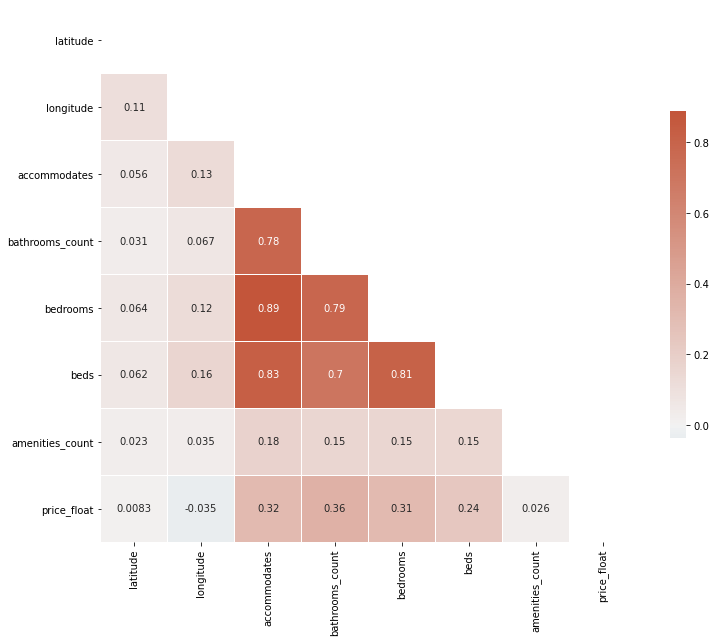

In [11]:
# Calculamos la matriz de correlación
corr = df_airbnb[selected_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crea una figura de tamaño 12, 12
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5});

En todo el conjunto, vemos que no parece que haya mucha correlación con las características seleccionadas y el precio. Obtenemos un máximo de 0.36 en el caso de _bathrooms_count_.

In [12]:
df_airbnb[selected_cols].describe()

,latitude,longitude,accommodates,bathrooms_count,bedrooms,beds,amenities_count,price_float
count,17608.000000,17608.000000,17608.000000,17585.000000,17333.000000,17511.000000,17608.000000,17608.000000
mean,39.657597,2.994115,5.857962,2.291555,2.952980,4.357147,23.949114,244.383561
std,0.165577,0.246129,2.727737,1.362200,1.520433,2.561838,9.809344,409.958169
min,39.301970,2.346500,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,39.543433,2.796892,4.000000,1.000000,2.000000,3.000000,16.000000,110.000000
50%,39.670285,3.047310,6.000000,2.000000,3.000000,4.000000,23.000000,179.000000
75%,39.797413,3.145215,8.000000,3.000000,4.000000,6.000000,31.000000,275.000000
max,39.930650,3.475520,16.000000,32.000000,40.000000,50.000000,65.000000,20736.000000


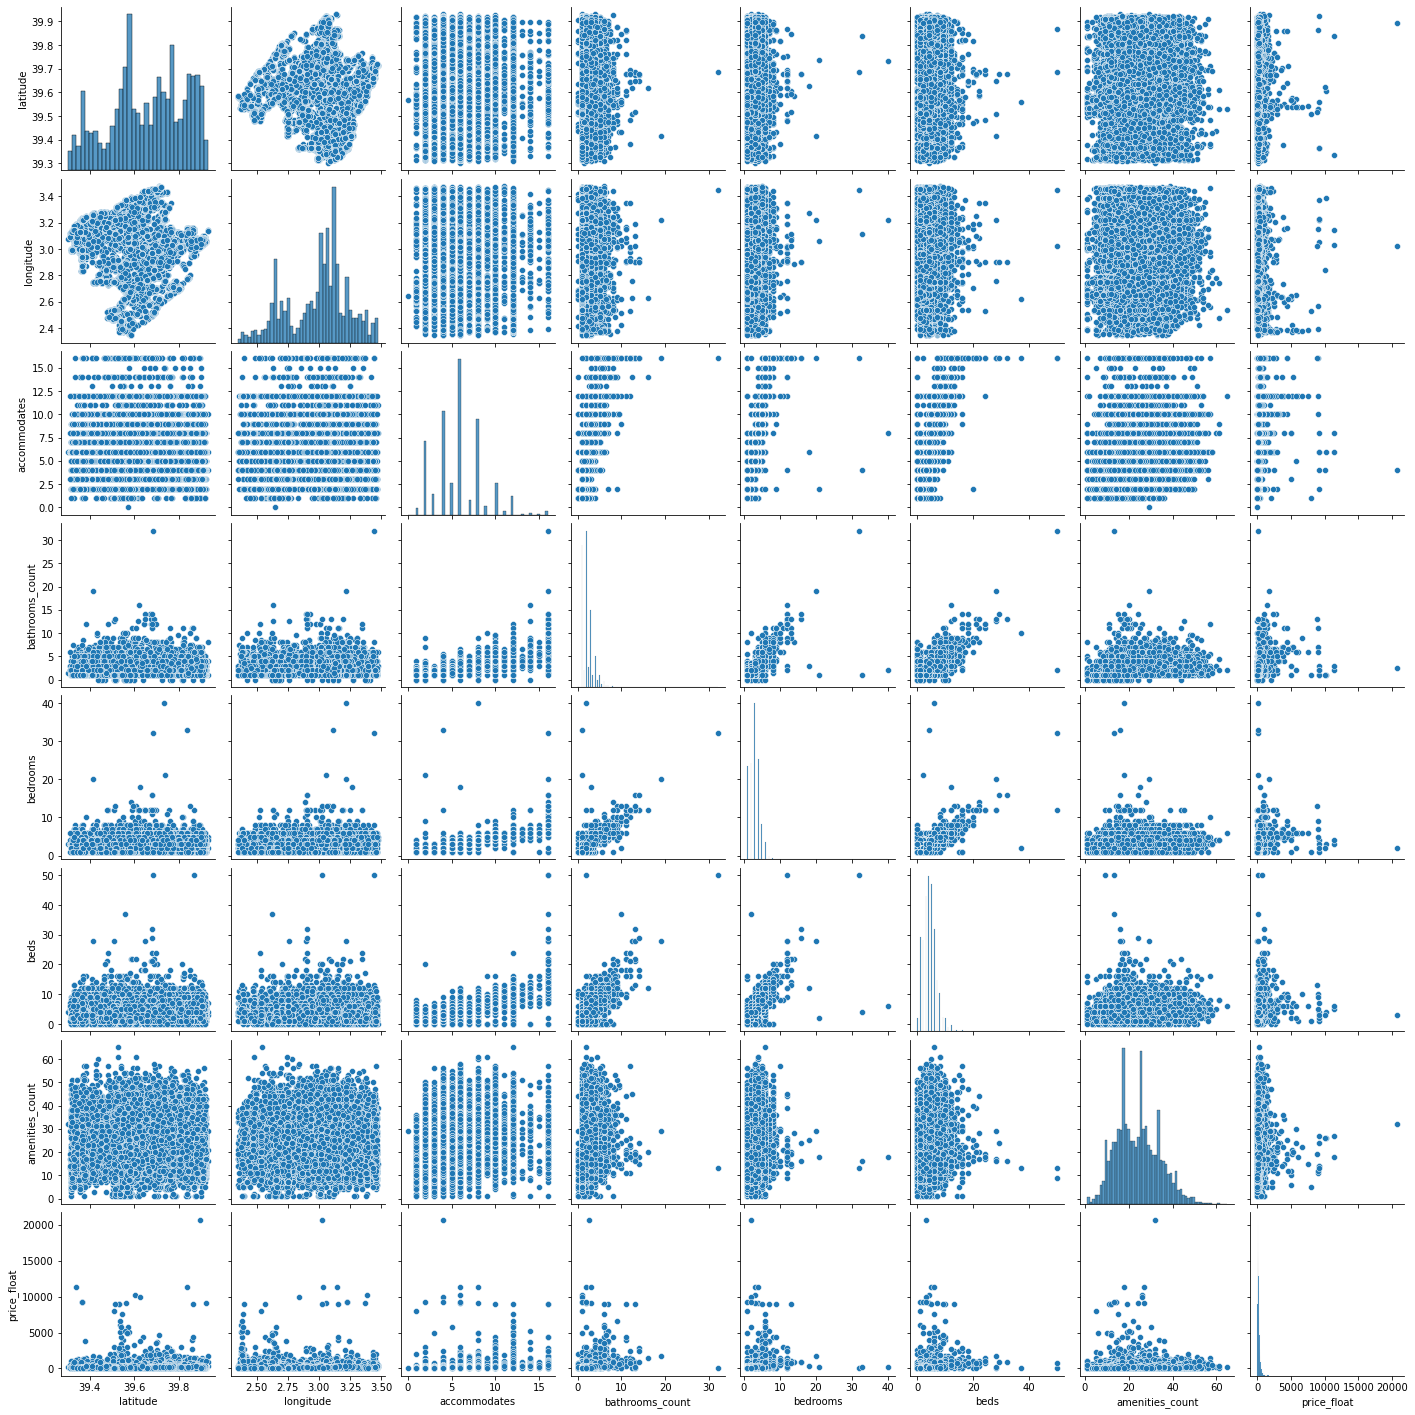

In [13]:
sns.pairplot(df_airbnb[selected_cols])

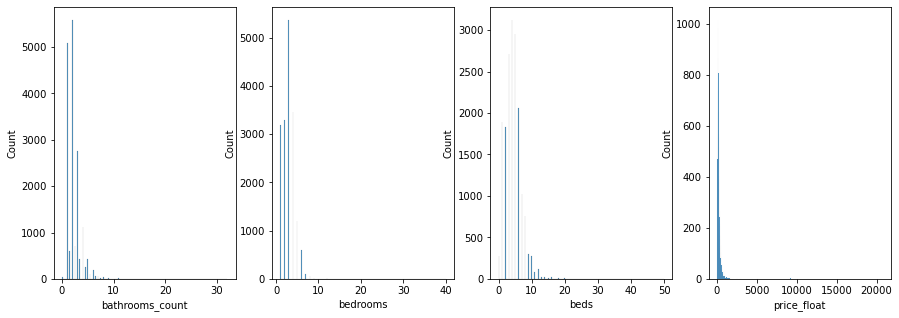

In [14]:
columns_outliers = list(["bathrooms_count","bedrooms","beds","price_float"])
fig = plt.figure(figsize=(15,5))
for i, column in enumerate(columns_outliers, start = 1):
    plt.subplot(1,4,i)
    sns.histplot(df_airbnb[column])

Se puede observar que tenemos _outliers_ bastante alejados en nuestro dataset. Vamos a visualizar los datos dejando de lado estos _outliers_. Nos encontramos con _outliers_ superiores en los casos de _bathrooms_count_, _bedrooms_, _beds_ y _price_float_. Por lo tanto, vamos a definir un valor máximo a partir del cual no vamos a tener en cuenta.

In [15]:
# definimos los valores máximos a partir de la media obtenida y la desviación estándar
max_price = df_airbnb['price_float'].mean()+df_airbnb['price_float'].std()*1.5
max_beds = df_airbnb['beds'].mean()+df_airbnb['beds'].std()*3
max_bedrooms = df_airbnb['bedrooms'].mean()+df_airbnb['bedrooms'].std()*3
max_bathrooms = df_airbnb['bathrooms_count'].mean()+df_airbnb['bathrooms_count'].std()*3

print("Precio máximo: ", np.round(max_price), "$")
print("Camas máximas: ", np.round(max_beds))
print("Habitaciones máximas: ", np.round(max_bedrooms))
print("Baños máximo: ", np.round(max_bathrooms))

Precio máximo:  859.0 $
Camas máximas:  12.0
Habitaciones máximas:  8.0
Baños máximo:  6.0


In [16]:
# Creamos un nuevo dataset sin tener en cuenta los outliers 
df_no_outliers = df_airbnb[(df_airbnb['price_float']<max_price) &
                           (df_airbnb['beds']<max_beds) &
                           (df_airbnb['bedrooms']<max_bedrooms) &
                           (df_airbnb['bathrooms_count']<max_bathrooms)][selected_cols]

In [17]:
# Comprobamos qué porcentaje del dataset nos quedamos eliminando estos outliers
print ("Porcentaje de datos con la que nos quedamos: ",np.round((len(df_no_outliers)/len(df_airbnb))*100,2),"%")
print ("Cantidad de alojamientos que se quedan fuera: ",len(df_airbnb)-len(df_no_outliers))

Porcentaje de datos con la que nos quedamos:  94.62 %
Cantidad de alojamientos que se quedan fuera:  947


Aproximadamente, hay 947 alojamientos de nuestro conjunto de datos (aproximadamente un 5% del total) que tienen características fuera de lo normal. Por lo tanto, no las vamos a tener en cuenta para realizar nuestro modelado, ya que se trata de alojamientos especiales o incluso posible error duranta la obtención de datos.

In [18]:
df_no_outliers.describe()

,latitude,longitude,accommodates,bathrooms_count,bedrooms,beds,amenities_count,price_float
count,16661.000000,16661.000000,16661.000000,16661.000000,16661.00000,16661.000000,16661.000000,16661.000000
mean,39.659967,2.999228,5.742032,2.195697,2.85169,4.249445,24.060020,207.358951
std,0.166464,0.241738,2.508943,1.116037,1.29503,2.233588,9.785815,139.227577
min,39.301970,2.346500,1.000000,0.000000,1.00000,0.000000,1.000000,10.000000
25%,39.547130,2.838980,4.000000,1.000000,2.00000,3.000000,16.000000,110.000000
50%,39.677670,3.049280,6.000000,2.000000,3.00000,4.000000,24.000000,175.000000
75%,39.801730,3.145000,8.000000,3.000000,4.00000,6.000000,31.000000,262.000000
max,39.930650,3.475520,16.000000,6.000000,7.00000,12.000000,65.000000,859.000000


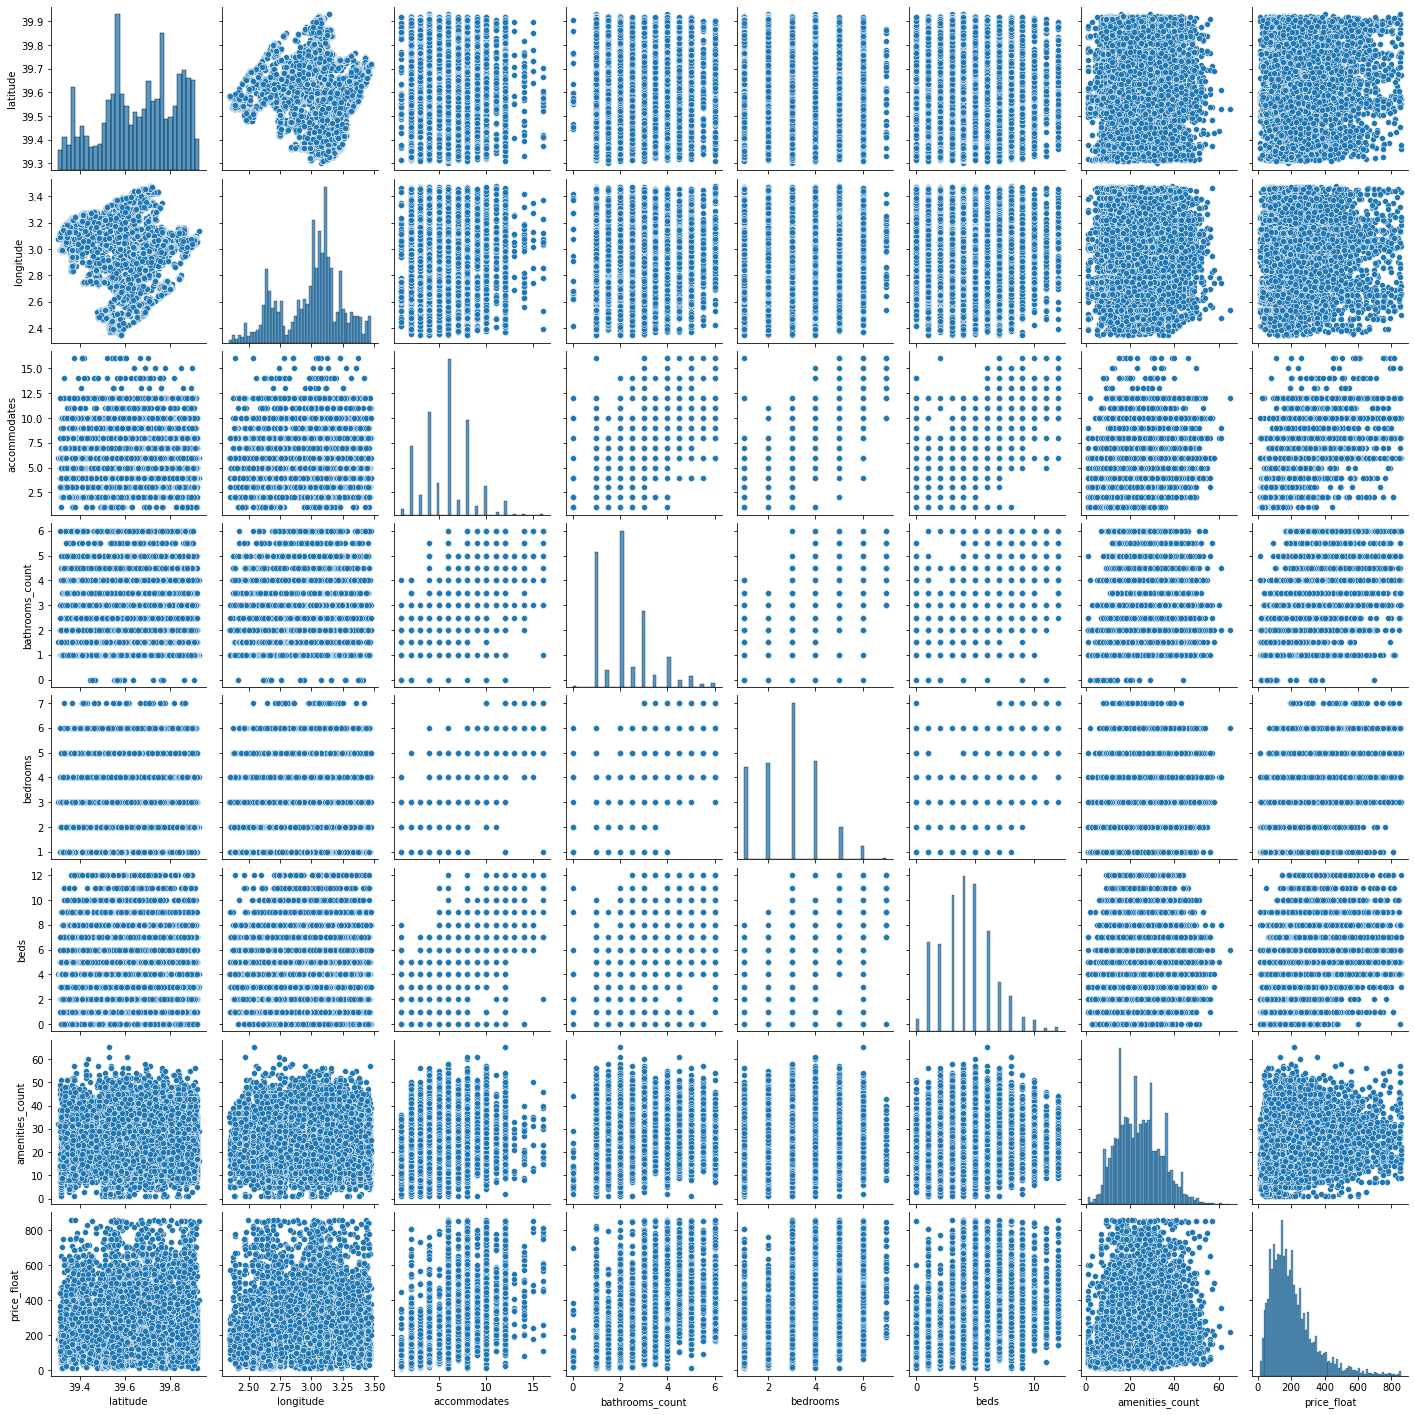

In [19]:
sns.pairplot(df_no_outliers)

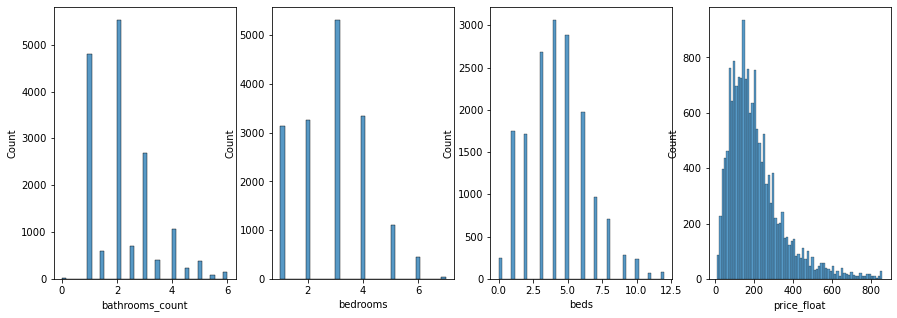

In [20]:
columns_outliers = list(["bathrooms_count","bedrooms","beds","price_float"])
fig = plt.figure(figsize=(15,5))
for i, column in enumerate(columns_outliers, start = 1):
    plt.subplot(1,4,i)
    sns.histplot(df_no_outliers[column])

Ahora se observa una distribución de los datos sin outliers. Vamos a comprobar la matriz de correlación:

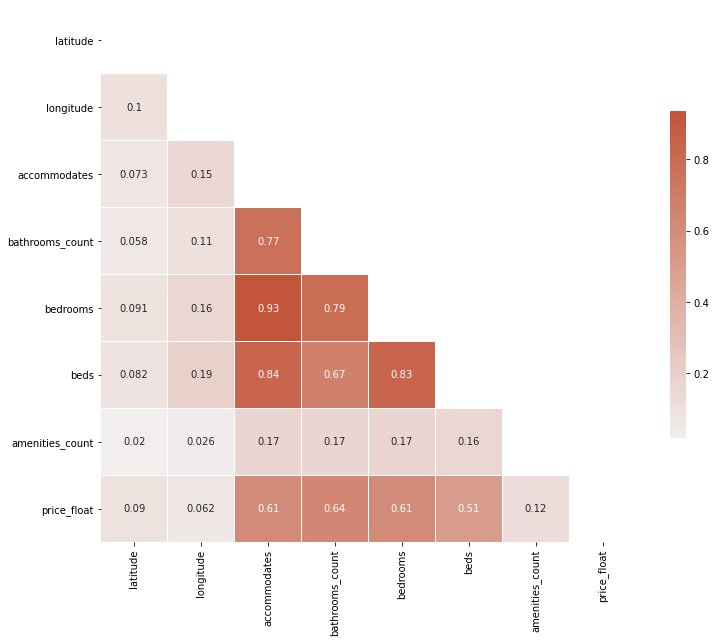

In [21]:
# Calculamos la matriz de correlación para los nuevos datos sin outliers
corr = df_no_outliers.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crea una figura de tamaño 12, 12
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5});

Podemos ver que hemos pasado de un máximo de 0.36 a un máximo de hasta 0.62 de correlación con el precio.

# Distribución de las propiedadas sobre el mapa de Mallorca

Vamos a revisar si existe relación entre la ubicación del alojamiento y el precio de este. Hemos visto que según la latitud y longitud no existe una correlación fuerte(0.08 y 0.043 respectivamente, en el mejor caso sin _outliers_). A pesar de eso, vamos comprobarlo visualmente.

In [22]:
min_longitude = 2.3027
min_latitude = 39.2616
max_longitude = 3.4818
max_latitude = 39.9649
BBox = (min_longitude, max_longitude, min_latitude, max_latitude)
map_mallorca = plt.imread('data/map.png')

In [23]:
df_plot = df_no_outliers

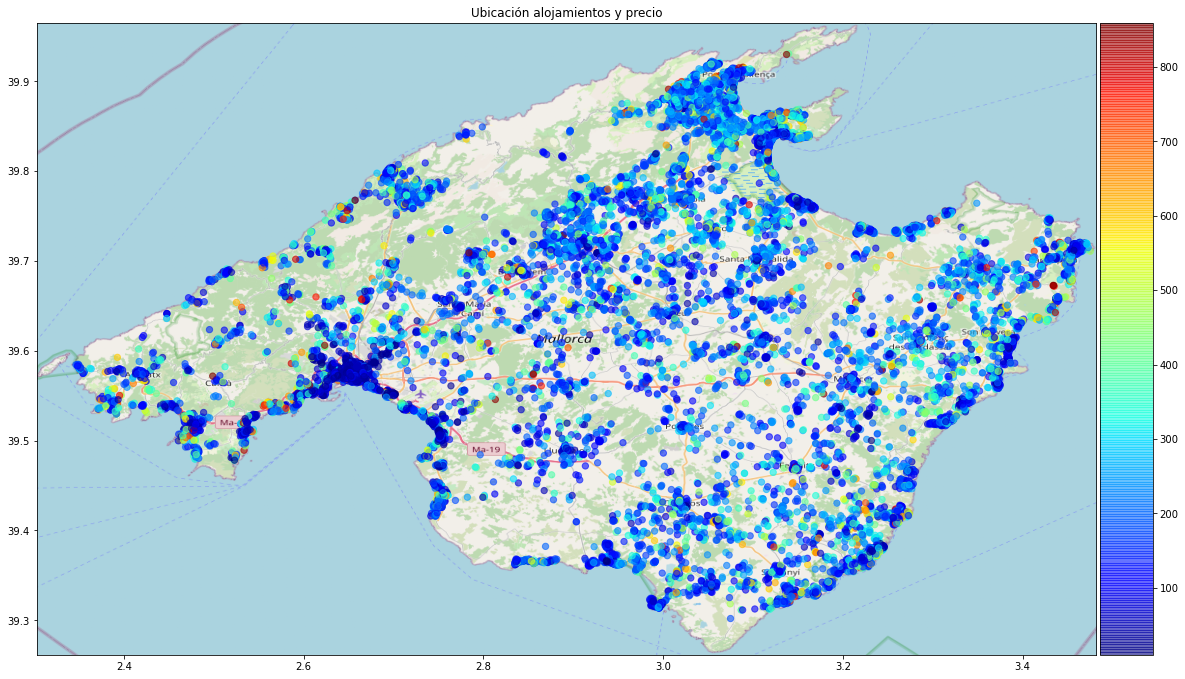

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize = (20,20))
im = ax.scatter(df_plot['longitude'],df_plot['latitude'], zorder=1, alpha= 0.6, c=df_plot['price_float'], s=40,cmap=plt.get_cmap("jet"))
ax.set_title('Ubicación alojamientos y precio')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_mallorca, zorder=0, extent = BBox, aspect= 'equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, ax=ax, cax = cax)
plt.show()

Se puede ver que efectivamente parece no haber una relación clara entre la ubicación y el precio. El rango de precios esta más o menos igual distribuido, se pueden encontrar precios extremos por casi toda la isla. También se observa que en la zona de Palma se concentran muchos alojamientos y de bajo precio. En la zona de Alúdia y Pollença (aproximadamente) también hay muchos alojamientos pero el precio parece ser ligeramente superior al de Palma. Del resto de zonas no se puede deducir más conclusiones.  
Vamos a comprobar también el precio medio según la localidad:

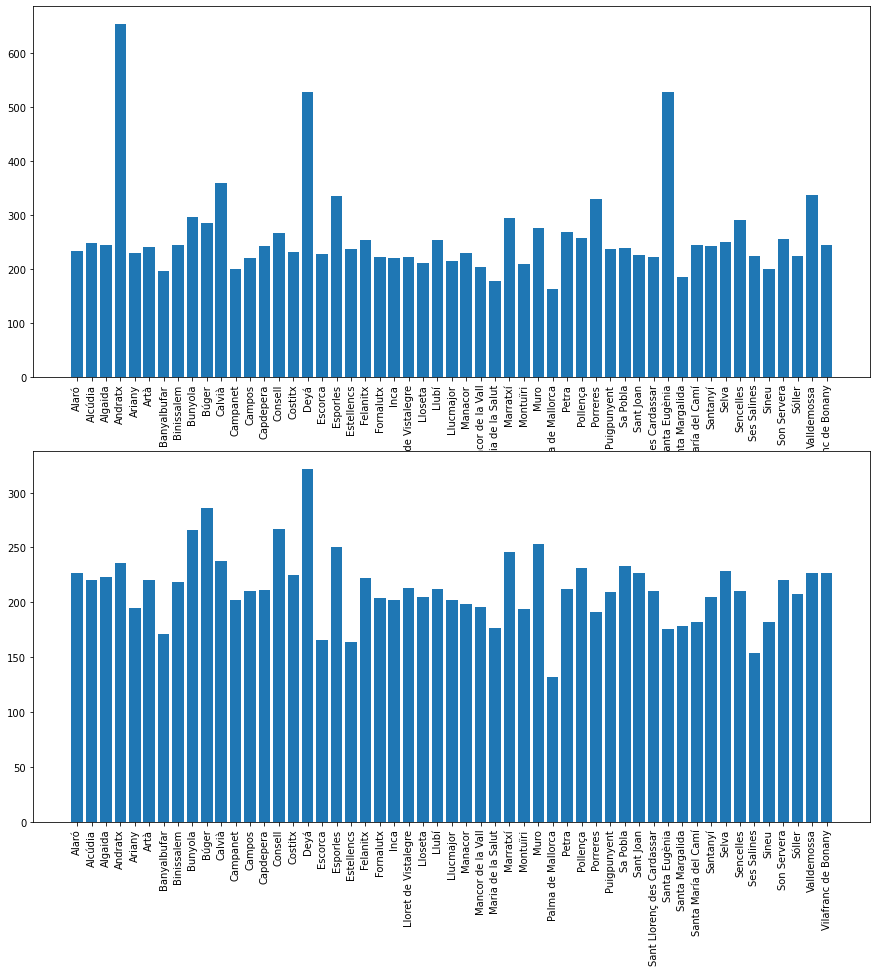

In [25]:
fig = plt.figure(figsize = (15,15))
# Primero para todo el conjunto de datos
por_localidades = df_airbnb.groupby('neighbourhood_cleansed')
plt.subplot(211)
# Primero para todo el conjunto de datos
plt.bar(list(por_localidades.groups.keys()),por_localidades['price_float'].mean(), width=0.8);
plt.xticks(range(len(list(por_localidades.groups.keys()))), list(por_localidades.groups.keys()), rotation=90);

plt.subplot(212)
# Segundo para el conjunto de datos sin outliers
por_localidades= df_no_outliers.groupby('neighbourhood_cleansed')
plt.bar(list(por_localidades.groups.keys()),por_localidades['price_float'].mean(), width=0.8);
plt.xticks(range(len(list(por_localidades.groups.keys()))), list(por_localidades.groups.keys()), rotation=90);

Podemos observar que efectivamente, la zona de Palma es la que tiene la media de alojamientos más baratos. Además vemos que en algunas zonas como (Andratx o Santa Eugenia) tienen bastantes alojamientos que estaban por encima de la media de precio.

## Modelización

Para intentar asignar un precio a un alojamiento nuevo vamos estimarlo directamente realizando una regresión a partir de las características que hemos comentado anteriormente:
- neighbourhood_cleansed
- latitude
- longitude
- room_type
- accommodates
- bathrooms_count
- bedrooms
- beds
- amenities_count 
- price_float 

### Funciones auxiliares

In [26]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
### Funciones auxiliares para realizar el modelado con variables numéricas y categóricas

class SelectColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None): # we do not need to specify the target in the transformer. We leave it as optional arg for consistency
        return self
    def transform(self, X):
        return X[self.columns]
    
class DropColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1)

### Pipeline para los datos categóricos

In [27]:
# Pipeline para datos categóricos
from sklearn.preprocessing import OneHotEncoder
# Seleccionamos las columnas
select_col_step = ('select', SelectColumns(['neighbourhood_cleansed','room_type']))

# Realizamos one hot encoding
one_hot_step = ('cols_one_hot', OneHotEncoder(sparse=False))

# Definimos la pipeline para los categóricos
cat_pipe_steps = [select_col_step, one_hot_step]
cat_pipe = Pipeline(cat_pipe_steps)

### Pipeline para los datos numéricos

In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Pipeline para datos numéricos, quitamos las columnas que son categóricas
drop_column_step = ('drop_column', DropColumns(['neighbourhood_cleansed','room_type']))

poly_step = ('poly', PolynomialFeatures())
imputation_step = ('imputer', SimpleImputer())
scaler_step = ('scaler', StandardScaler())
step_pca = ('pca', PCA())

num_pipe_steps = [drop_column_step, imputation_step, poly_step, scaler_step, step_pca]

num_pipe = Pipeline(num_pipe_steps)

### _Feature union_ de los pipelines anteriores

In [29]:
from sklearn.pipeline import FeatureUnion
# Lista con los pasos que realizan la transformación de los datos categóricos y numéricos
transformer_list = [('num_pipe', num_pipe),
                    ('cat_pipe', cat_pipe)]

# Union de los dos pipeline anteiores en uno solo
data_prep_pipe = FeatureUnion(transformer_list=transformer_list)
data_prep_step = ('data_prep', data_prep_pipe)

### _Train-test Split_ para realizar el entrenamiento y el test

In [30]:
# Dataframe que se utilizará para realizar la estimación
df_clean = df_no_outliers

#Dividimos el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('price_float', axis =1), df_clean['price_float'], test_size=0.2, random_state=42)

### Random Forest Regressor

In [31]:
# Paso con el modelado mediante RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

regressor_step = ('model', RandomForestRegressor())
pipe_steps = [data_prep_step, regressor_step]

pipe = Pipeline(pipe_steps)

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('data_prep',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('drop_column',
                                                                  <__main__.DropColumns object at 0x000001643BD59688>),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('poly',
                                                                  PolynomialFeatures()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA())])),
                                                ('cat_pipe',
            

In [33]:
def mape (y_true, y_pred):
    """
    Devuelve el error absoluto porcentual medio (MAPE)
    """
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred_pipe = pipe.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_test_pred_pipe)
mape_rf = mape(y_test, y_test_pred_pipe)
r2_rf = r2_score(y_test, y_test_pred_pipe)
print("Media del error absoluto test: ",np.round(mae_rf,2),"$")
print("Media porcentual del error absoluto test: ", np.round(mape_rf*100,2), "%")
print("Valor r cuadrado test: ", r2_rf)

Media del error absoluto test:  68.77 $
Media porcentual del error absoluto test:  43.45 %
Valor r cuadrado test:  0.48301038857969203


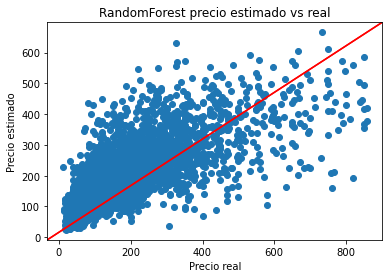

In [35]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms


fig, ax = plt.subplots()
ax.scatter(y_test,y_test_pred_pipe)
ax.set_xlabel("Precio real")
ax.set_ylabel("Precio estimado")
ax.set_title("RandomForest precio estimado vs real")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.add_line(line)
plt.show()

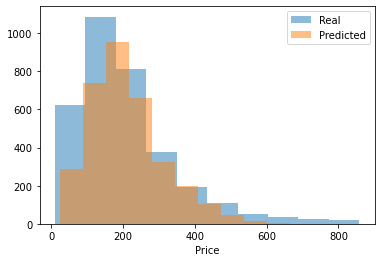

In [36]:
plt.hist(y_test, alpha=0.5, label='Real')
plt.hist(y_test_pred_pipe, alpha=0.5, label='Predicted')
plt.xlabel('Price')
plt.legend(loc='best')
plt.show()

### Linear Regression

In [37]:
# Paso con el modelado mediante Linear Regresion
from sklearn.linear_model import LinearRegression

regressor_step = ('model', LinearRegression())
pipe_steps = [data_prep_step, regressor_step]

pipe = Pipeline(pipe_steps)

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('data_prep',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('drop_column',
                                                                  <__main__.DropColumns object at 0x000001643BD59688>),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('poly',
                                                                  PolynomialFeatures()),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA())])),
                                                ('cat_pipe',
            

In [39]:
y_test_pred_pipe = pipe.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_test_pred_pipe)
mape_lr = mape(y_test, y_test_pred_pipe)
r2_lr = r2_score(y_test, y_test_pred_pipe)
print("Media del error absoluto test: ",np.round(mae_lr,2),"$")
print("Media porcentual del error absoluto test: ", np.round(mape_lr*100,2), "%")
print("Valor r cuadrado test: ", r2_lr)

Media del error absoluto test:  70.99 $
Media porcentual del error absoluto test:  46.33 %
Valor r cuadrado test:  0.4703644258634301


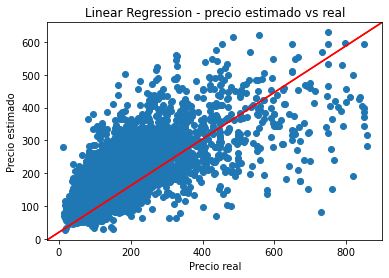

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_test_pred_pipe)
ax.set_xlabel("Precio real")
ax.set_ylabel("Precio estimado")
ax.set_title("Linear Regression - precio estimado vs real")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.add_line(line)
plt.show()

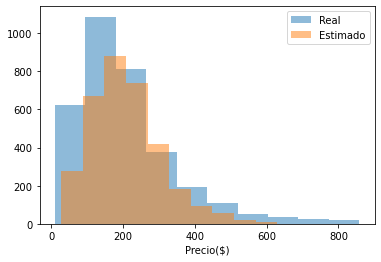

In [41]:
plt.hist(y_test, alpha=0.5, label='Real')
plt.hist(y_test_pred_pipe, alpha=0.5, label='Estimado')
plt.xlabel('Precio($)')
plt.legend(loc='best')
plt.show()

### Definición del GridSearchCV

Vemos que el Random Forest Regressor nos ha dato unos resultados ligeremanete superiores, veamos si podemos mejorar estos realizando una búsqueda exhaustiva mediante GridSearch.

In [42]:
from sklearn.model_selection import GridSearchCV

regressor_step = ('model', RandomForestRegressor())
pipe_steps = [data_prep_step, regressor_step]

pipe = Pipeline(pipe_steps)

params_pipe = { 'data_prep__num_pipe__poly__degree': [2, 3],
                'data_prep__num_pipe__pca__n_components': [6, 9],
                'model__max_depth': [15, 17],
                'model__min_samples_leaf': [5, 10],
                'model__min_samples_split': [7, 9]}

In [43]:
# Entremos el modelos utilizando el GridSearch
clf_gs = GridSearchCV(pipe, param_grid=params_pipe, verbose=1, n_jobs = -1)
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.3min finished


GridSearchCV(estimator=Pipeline(steps=[('data_prep',
                                        FeatureUnion(transformer_list=[('num_pipe',
                                                                        Pipeline(steps=[('drop_column',
                                                                                         <__main__.DropColumns object at 0x000001643BD59688>),
                                                                                        ('imputer',
                                                                                         SimpleImputer()),
                                                                                        ('poly',
                                                                                         PolynomialFeatures()),
                                                                                        ('scaler',
                                                                                         StandardScal

In [44]:
print(clf_gs.best_estimator_.named_steps)

{'data_prep': FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('drop_column',
                                                 <__main__.DropColumns object at 0x0000016433546F48>),
                                                ('imputer', SimpleImputer()),
                                                ('poly', PolynomialFeatures()),
                                                ('scaler', StandardScaler()),
                                                ('pca', PCA(n_components=9))])),
                               ('cat_pipe',
                                Pipeline(steps=[('select',
                                                 <__main__.SelectColumns object at 0x0000016433554348>),
                                                ('cols_one_hot',
                                                 OneHotEncoder(sparse=False))]))]), 'model': RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=9)}


In [45]:
from sklearn.metrics import mean_absolute_error
y_test_pred = clf_gs.predict(X_test)


mae_gsrf = mean_absolute_error(y_test, y_test_pred)
mape_gsrf = mape(y_test, y_test_pred)
r2_gsrf = r2_score(y_test, y_test_pred)
print("Media del error absoluto test: ",np.round(mae_gsrf,2),"$")
print("Media porcentual del error absoluto test: ", np.round(mape_gsrf*100,2), "%")
print("Valor r cuadrado test: ", r2_gsrf)

Media del error absoluto test:  67.9 $
Media porcentual del error absoluto test:  42.33 %
Valor r cuadrado test:  0.49107547019142606


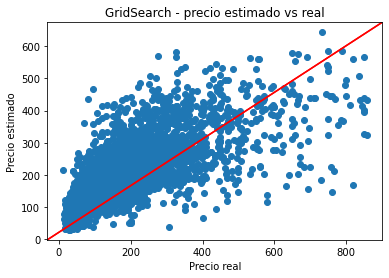

In [46]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_test_pred)
ax.set_xlabel("Precio real")
ax.set_ylabel("Precio estimado")
ax.set_title("GridSearch - precio estimado vs real")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.add_line(line)
plt.show()

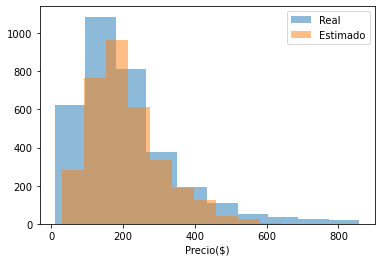

In [47]:
plt.hist(y_test, alpha=0.5, label='Real')
plt.hist(y_test_pred, alpha=0.5, label='Estimado')
plt.xlabel('Precio($)')
plt.legend(loc='best')
plt.show()

### Resultados

In [48]:
results = {'Modelo':['Random Forest','Linear Regression', 'GridSearchCV Random Forest'],
     'MAE': [mae_rf, mae_lr, mae_gsrf], 
     'MAPE': [mape_rf, mape_lr, mape_gsrf],
     'Rsquared':[r2_rf, r2_lr, r2_gsrf]}
df_results = pd.DataFrame(data=results)
df_results

,Modelo,MAE,MAPE,Rsquared
0,Random Forest,68.765868,0.434486,0.483010
1,Linear Regression,70.993444,0.463259,0.470364
2,GridSearchCV Random Forest,67.899873,0.423320,0.491075


Viendo los resultado obtenidos, las mejores estimaciones se han conseguido mediante el Grid Search aplicado al Random Forest. La diferencia de la media del error entre el Grid Search y el Random Forest por defecto ronda el dólar, por lo tanto podemos considerar que apenas hay diferencia entre ambos modelos. En el caso de la Linear Regression es algo mayor a 2 dólares, por lo tanto podemos considerar que no hay grandes diferencias. 

In [49]:
# Absolute Porcentage Error, error absoluto porcentual para cada estimacion
ape = np.abs((y_test - y_test_pred)/y_test)

<AxesSubplot:xlabel='price_float', ylabel='Count'>

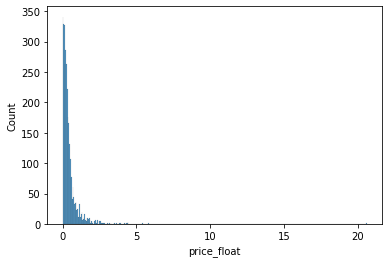

In [50]:
sns.histplot(ape)

Se puede observar que se han realizado estimaciones muy alejadas al precio real.

In [51]:
mask = ape<1

In [52]:
print ("Porcentaje de alojamientos cuyo error sobre el precio estimado es inferior al 50%: ", np.round((sum(ape<0.5)/len(ape))*100,2), "%")

Porcentaje de alojamientos cuyo error sobre el precio estimado es inferior al 50%:  75.58 %


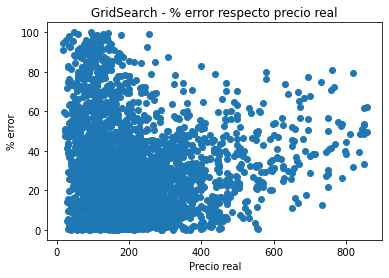

In [53]:
mask = ape<1
fig, ax = plt.subplots()
ax.scatter(y_test[mask],ape[mask]*100)
ax.set_xlabel("Precio real")
ax.set_ylabel("% error")
ax.set_title("GridSearch - % error respecto precio real")
plt.show()

Por otro lado, vemos que se consigue estimar el precio de un alojamiento dentro de un margen del 50% para el 75% de los casos aproximadamente. Ademas, vemos que este error porcentual es bastante más grande para los alojamientos cuyos precios son inferiores al 200$.

# ANEXO

Información complementaria menor para obtener algunos resultados durante el análisis de los datos.

In [54]:
df_airbnb = pd.read_csv('data/airbnb.csv')

### 1.1 host_listing_count host_total_listing_count

In [55]:
# Revisión datos en host_listing_count y host_total_listing_count
print(sum(df_airbnb['host_listings_count'] != df_airbnb['host_total_listings_count']))
df_airbnb[df_airbnb['host_listings_count'] != df_airbnb['host_total_listings_count']]
# Se observa que ambas columnas contiene la misma información.

2


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1732,6725646,https://www.airbnb.com/rooms/6725646,20200919153121,2020-09-19,Casa vacacional en ambiente rural,"Casa con mucho estilo, decorada hasta el últim...","Está situada en el pequeño pueblo de lloret, e...",https://a0.muscache.com/pictures/84909310/b273...,35190673,https://www.airbnb.com/users/show/35190673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Lloret de Vistalegre, Illes Balears, Spain",Lloret de Vistalegre,NaN,39.6199,2.97435,Entire apartment,Entire home/apt,2,NaN,2 baths,1.0,2.0,"[""Pool"", ""First aid kit"", ""Free parking on pre...",$100.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2020-09-19,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2923,13023732,https://www.airbnb.com/rooms/13023732,20200919153121,2020-09-20,Haus Mitten im Weinberg,"Sie wohnen auf ca. 90 m², aufgeteilt in zwei S...",Mallorquinische Nachbarn rundherum und in alle...,https://a0.muscache.com/pictures/d1fa8cbc-fa7c...,71923489,https://www.airbnb.com/users/show/71923489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Binissalem, Balearic Islands, Spain",Binissalem,NaN,39.6712,2.86230,Entire house,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Pool"", ""Hair dryer"", ""Iron"", ""Free parking o...",$261.00,3,90,3,3,90,90,3.0,90.0,NaN,t,29,59,89,364,2020-09-20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [56]:
df_airbnb['property_type'].value_counts()

Entire villa                          4878
Entire house                          4823
Entire apartment                      3259
Entire cottage                         880
Entire chalet                          655
Private room in apartment              632
Entire townhouse                       364
Private room in house                  286
Entire condominium                     284
Room in boutique hotel                 211
Earth house                            119
Room in hotel                          107
Entire guesthouse                       96
Private room in bed and breakfast       93
Entire loft                             79
Entire serviced apartment               73
Entire guest suite                      55
Private room in villa                   51
Entire bungalow                         49
Room in serviced apartment              49
Private room in cottage                 41
Private room in resort                  40
Boat                                    39
Private roo